In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [5]:
# Read the CSV file
df = pd.read_csv('dog_license_data.csv')
df.head()

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract.Year,population,total_units,med_inc
0,BELLA,F,1996,Maltese,11373,2019-04-07,2024-04-07,2022,102104.0,34350.0,62072.0
1,SNOW,F,2006,Bichon Frise,11214,2018-05-18,2024-04-16,2023,95361.0,33853.0,58487.0
2,BRUNO,M,2015,American Pit Bull Terrier/Pit Bull,11234,2017-12-05,2027-11-01,2017,94254.0,35153.0,86185.0
3,M.,F,2005,Shih Tzu,10462,2017-12-07,2024-08-30,2017,78470.0,31393.0,59032.0
4,TEDDY,M,2015,Portuguese Water Dog,10027,2018-02-04,2024-01-11,2018,65840.0,26500.0,58435.0


In [6]:
df.value_counts('AnimalGender')

AnimalGender
M    45094
F    39179
Name: count, dtype: int64

In [7]:
zipcode_counts = df.groupby('ZipCode').size().reset_index(name='Dog_Count')
print(zipcode_counts.head())

   ZipCode  Dog_Count
0      923          2
1     1033          1
2     1067          1
3     1214          1
4     1312          1


In [8]:
df_zipcode_level = df.pivot_table(index=['ZipCode','population','total_units', 'med_inc'],
               values='AnimalName',
               aggfunc='count')\
    .reset_index()\
    .rename(columns={'AnimalName':'dog_count'})\
    .sort_values(by='dog_count')

df_zipcode_level.head(25)

,ZipCode,population,total_units,med_inc,dog_count
2,1453,43478.0,18661.0,69525.0,0
3,1830,27403.0,11227.0,66052.0,0
4,2914,21966.0,10229.0,51513.0,0
8,6605,24776.0,10236.0,51523.0,0
12,7002,70553.0,29143.0,72839.0,0
136,10977,70743.0,17370.0,67799.0,0
16,7068,6240.0,2547.0,145994.0,0
332,92660,36100.0,17486.0,142500.0,1
272,11729,26306.0,9073.0,113240.0,1
274,11735,33123.0,11491.0,128438.0,1


`geom_smooth()` using formula = 'y ~ x'


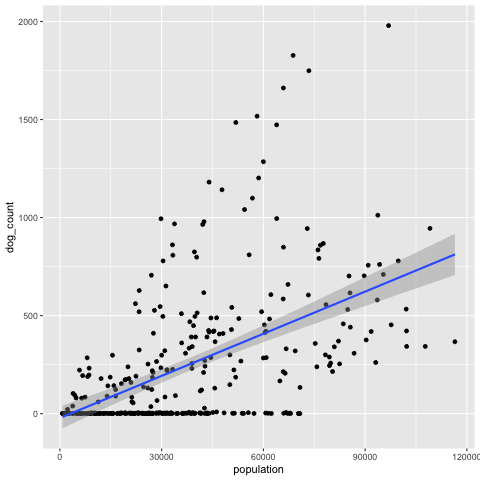

In [10]:
%%R -i df_zipcode_level

ggplot(df_zipcode_level) + 
    aes(x=population, y=dog_count) + 
    geom_point() +
    geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'


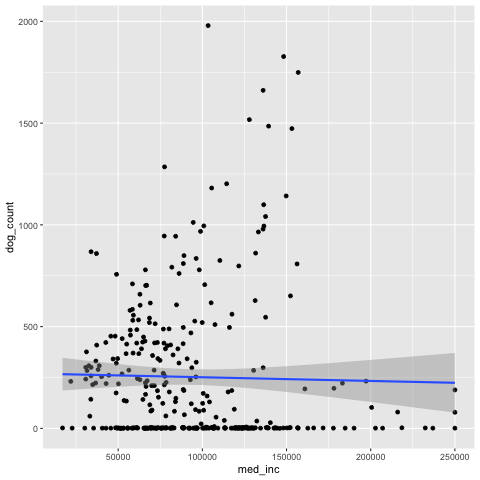

In [11]:
%%R -i df_zipcode_level

ggplot(df_zipcode_level) + 
    aes(x=med_inc, y=dog_count) + 
    geom_point() +
    geom_smooth(method='lm')

In [16]:
# Filter for zip codes with more than 10 dogs
df_zipcodes_with_dogs = df_zipcode_level[df_zipcode_level['dog_count'] > 10]

# Export to CSV
df_zipcodes_with_dogs.to_csv('zipcodes_more_than_10_dogs.csv', index=False)

In [17]:
# Read the CSV file
df_more_than_10_dogs = pd.read_csv('zipcodes_more_than_10_dogs.csv')
df_more_than_10_dogs.head()

,ZipCode,population,total_units,med_inc,dog_count
0,10162,2268.0,1323.0,99300.0,22
1,11040,42634.0,13767.0,140368.0,28
2,11001,26818.0,9111.0,132344.0,36
3,11697,3782.0,2785.0,113047.0,39
4,11411,21605.0,6712.0,108131.0,55


`geom_smooth()` using formula = 'y ~ x'


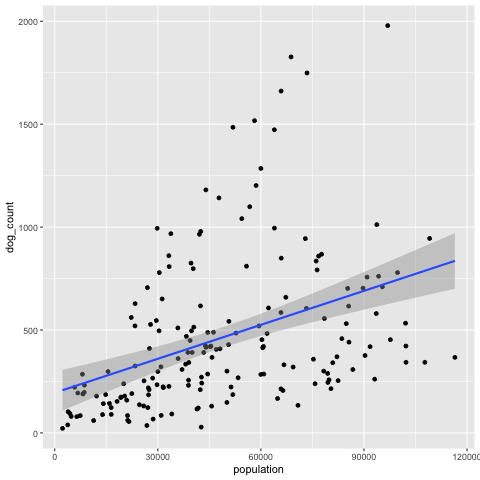

In [18]:
%%R -i df_more_than_10_dogs

ggplot(df_more_than_10_dogs) + 
    aes(x=population, y=dog_count) + 
    geom_point() +
    geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'


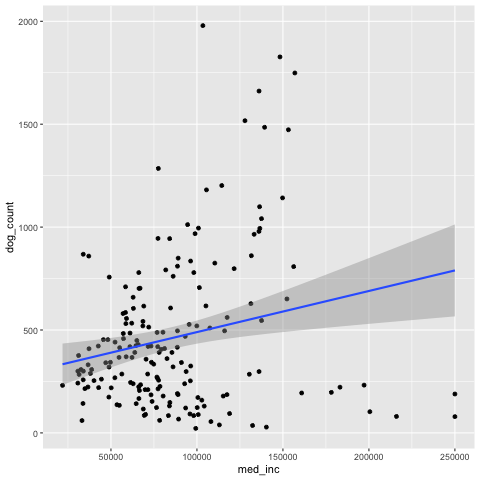

In [19]:
%%R -i df_more_than_10_dogs

ggplot(df_more_than_10_dogs) + 
    aes(x=med_inc, y=dog_count) + 
    geom_point() +
    geom_smooth(method='lm')

In [26]:
df_more_than_10_dogs_sorted = df_more_than_10_dogs.sort_values('dog_count', ascending=False)
df_more_than_10_dogs_sorted.head()

,ZipCode,population,total_units,med_inc,dog_count
180,10025,96918.0,47891.0,103440.0,1979
179,11201,68777.0,33948.0,148282.0,1827
178,11215,73419.0,32140.0,156930.0,1749
177,10023,65891.0,45139.0,136109.0,1661
176,10128,58147.0,35628.0,127919.0,1517


`geom_smooth()` using formula = 'y ~ x'


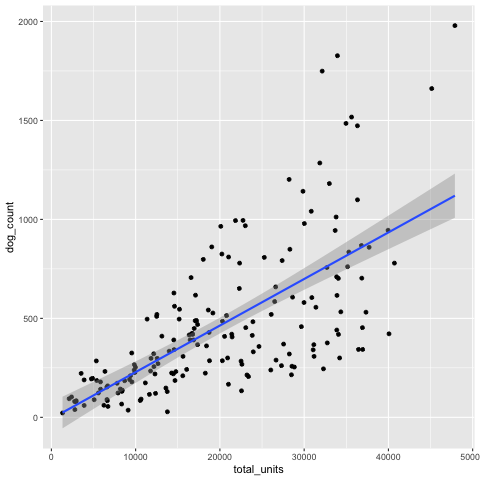

In [27]:
%%R -i df_more_than_10_dogs

ggplot(df_more_than_10_dogs) + 
    aes(x=total_units, y=dog_count) + 
    geom_point() +
    geom_smooth(method='lm')

In [28]:
df_more_than_10_dogs_sorted_2 = df_more_than_10_dogs.sort_values('total_units', ascending=False)
df_more_than_10_dogs_sorted_2.head()

,ZipCode,population,total_units,med_inc,dog_count
180,10025,96918.0,47891.0,103440.0,1979
177,10023,65891.0,45139.0,136109.0,1661
149,11226,99776.0,40713.0,66173.0,779
107,10467,102209.0,40071.0,42639.0,422
161,11385,109111.0,39959.0,77350.0,945


In [29]:
# Add a new column for dogs per 100,000 people
df_more_than_10_dogs_sorted_2['dogs_per_100k'] = (df_more_than_10_dogs_sorted_2['dog_count'] / df_more_than_10_dogs_sorted_2['population']) * 100000

# View the result
df_more_than_10_dogs_sorted_2.head()

,ZipCode,population,total_units,med_inc,dog_count,dogs_per_100k
180,10025,96918.0,47891.0,103440.0,1979,2041.932355
177,10023,65891.0,45139.0,136109.0,1661,2520.829855
149,11226,99776.0,40713.0,66173.0,779,780.748877
107,10467,102209.0,40071.0,42639.0,422,412.879492
161,11385,109111.0,39959.0,77350.0,945,866.090495


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


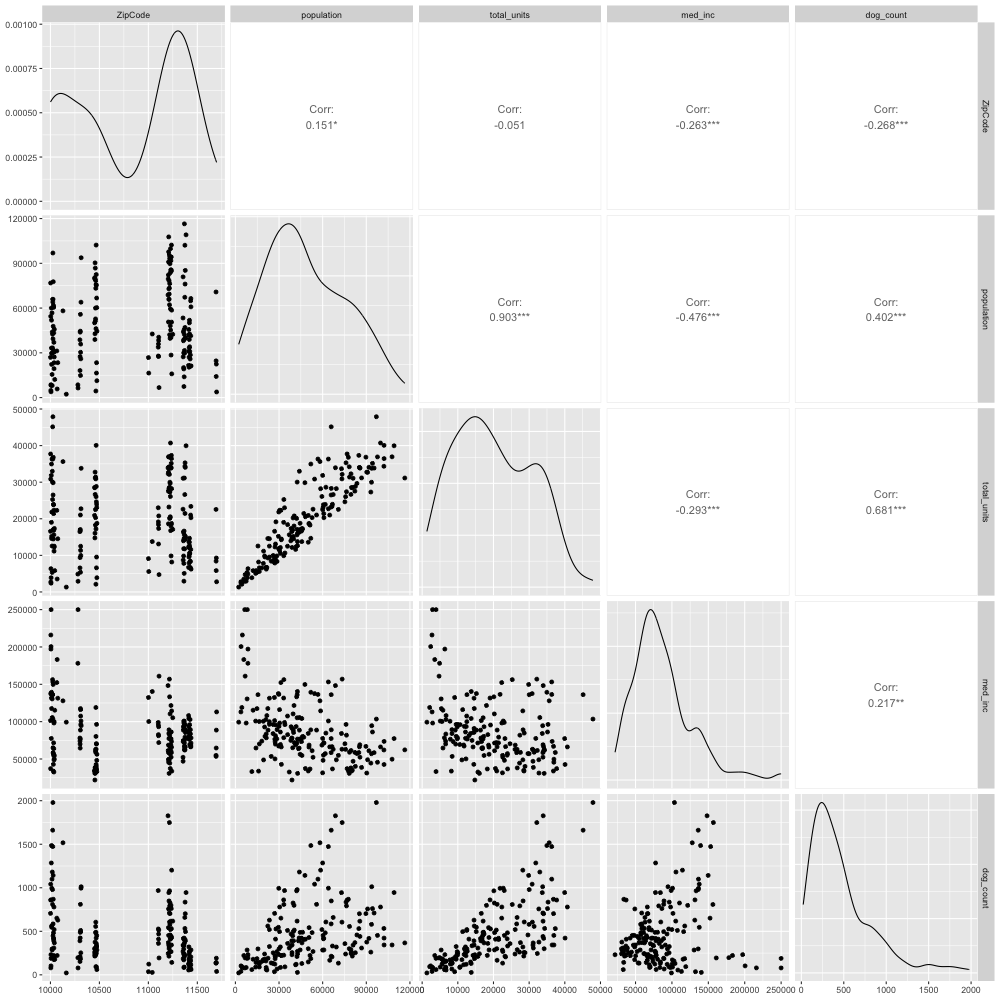

In [33]:
%%R -w 1000 -h 1000

library("GGally")

# Sometimes it's nice to make a pairplot to quickly see relationships between variables
ggpairs(df_more_than_10_dogs)





In [34]:
%%R 
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

model <- lm("ZipCode ~ population + dog_count + med_inc", data=df_more_than_10_dogs)
summary(model)


Call:
lm(formula = "ZipCode ~ population + dog_count + med_inc", data = df_more_than_10_dogs)

Residuals:
   Min     1Q Median     3Q    Max 
-900.1 -488.4  109.0  490.2 1094.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.086e+04  1.669e+02  65.080  < 2e-16 ***
population   5.788e-03  2.066e-03   2.802  0.00564 ** 
dog_count   -5.675e-01  1.359e-01  -4.177 4.64e-05 ***
med_inc     -7.688e-04  1.302e-03  -0.590  0.55565    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 533.6 on 177 degrees of freedom
Multiple R-squared:  0.1535,	Adjusted R-squared:  0.1391 
F-statistic:  10.7 on 3 and 177 DF,  p-value: 1.694e-06



In [35]:
%%R 
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

model <- lm("dog_count ~ population + ZipCode + med_inc", data=df_more_than_10_dogs)
summary(model)


Call:
lm(formula = "dog_count ~ population + ZipCode + med_inc", data = df_more_than_10_dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-789.44 -145.46   -5.69  112.16  976.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.360e+03  4.276e+02   3.181  0.00173 ** 
population   9.058e-03  8.818e-04  10.271  < 2e-16 ***
ZipCode     -1.581e-01  3.785e-02  -4.177 4.64e-05 ***
med_inc      4.302e-03  6.072e-04   7.085 3.17e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 281.6 on 177 degrees of freedom
Multiple R-squared:  0.433,	Adjusted R-squared:  0.4233 
F-statistic: 45.05 on 3 and 177 DF,  p-value: < 2.2e-16



In [36]:
%%R 
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

model <- lm("population ~ dog_count + ZipCode + med_inc", data=df_more_than_10_dogs)
summary(model)


Call:
lm(formula = "population ~ dog_count + ZipCode + med_inc", data = df_more_than_10_dogs)

Residuals:
   Min     1Q Median     3Q    Max 
-42326 -13436  -4757  12652  58729 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.750e+04  2.964e+04  -0.590  0.55565    
dog_count    4.123e+01  4.014e+00  10.271  < 2e-16 ***
ZipCode      7.339e+00  2.619e+00   2.802  0.00564 ** 
med_inc     -3.747e-01  3.689e-02 -10.157  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19000 on 177 degrees of freedom
Multiple R-squared:  0.5159,	Adjusted R-squared:  0.5077 
F-statistic: 62.87 on 3 and 177 DF,  p-value: < 2.2e-16

